# Ejercicio SVM datos Eurocopa 2012
A partir del archivo Euro_2012_stats_TEAM, se pide:

1. Obtener la matriz de correlación. ¿Qué columnas están mejor correlacionadas?

2. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos

3. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

    - % de goles por disparo: 40%
    - Total shots (inc. Blocked): 102
    - Corners Taken: 5
    - Passes: 82
    - Dribbles: 23

## 1. Importa las librerias necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io

%matplotlib inline

from sklearn.svm import LinearSVC

## 2. Carga los datos

In [2]:
DATAPATH = 'data/Euro_2012_stats_TEAM.csv'

data = pd.read_csv(DATAPATH)

data.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [29]:
data.tail()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
11,Republic of Ireland,1,7,12,0.368,0.052,28,0,0,0,...,17,0.654,43,51,11,6,1,10,10,17
12,Russia,5,9,31,0.225,0.125,59,2,0,0,...,10,0.770,34,43,4,6,0,7,7,16
13,Spain,12,42,33,0.559,0.160,100,0,1,0,...,15,0.938,102,83,19,11,0,17,17,18
14,Sweden,5,17,19,0.472,0.138,39,3,0,0,...,8,0.616,35,51,7,7,0,9,9,18
15,Ukraine,2,7,26,0.212,0.060,38,0,0,0,...,13,0.765,48,31,4,5,0,9,9,18


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Team                        16 non-null     object 
 1   Goals                       16 non-null     int64  
 2   Shots on target             16 non-null     int64  
 3   Shots off target            16 non-null     int64  
 4   Shooting Accuracy           16 non-null     object 
 5   % Goals-to-shots            16 non-null     object 
 6   Total shots (inc. Blocked)  16 non-null     int64  
 7   Hit Woodwork                16 non-null     int64  
 8   Penalty goals               16 non-null     int64  
 9   Penalties not scored        16 non-null     int64  
 10  Headed goals                16 non-null     int64  
 11  Passes                      16 non-null     int64  
 12  Passes completed            16 non-null     int64  
 13  Passing Accuracy            16 non-nu

In [32]:
data.dtypes

Team                           object
Goals                           int64
Shots on target                 int64
Shots off target                int64
Shooting Accuracy              object
% Goals-to-shots               object
Total shots (inc. Blocked)      int64
Hit Woodwork                    int64
Penalty goals                   int64
Penalties not scored            int64
Headed goals                    int64
Passes                          int64
Passes completed                int64
Passing Accuracy               object
Touches                         int64
Crosses                         int64
Dribbles                        int64
Corners Taken                   int64
Tackles                         int64
Clearances                      int64
Interceptions                   int64
Clearances off line           float64
Clean Sheets                    int64
Blocks                          int64
Goals conceded                  int64
Saves made                      int64
Saves-to-sho

In [3]:
convert_SA = lambda x : float(x[:-1])

data["Shooting Accuracy"] = data["Shooting Accuracy"].apply(convert_SA)

In [4]:
convert_SA = lambda x : float(x[:-1])

data["% Goals-to-shots"] = data["% Goals-to-shots"].apply(convert_SA)

data["Saves-to-shots ratio"] = data["Saves-to-shots ratio"].apply(convert_SA)

In [36]:
data.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9,16.0,32,0,0,0,...,13,81.3,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9,12.9,39,0,0,0,...,9,60.1,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0,20.0,27,1,0,0,...,10,66.7,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0,17.2,40,0,0,0,...,22,88.1,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9,6.5,65,1,0,0,...,6,54.6,36,51,5,6,0,11,11,19


## 3. Obtener la matriz de correlación con TODAS las variables. ¿Hay algunas columnas que estén muy correlacionadas?

Si:
- Subs on y Subs off
- Passes y Passescompleted
- Shoot on target con Passes y Goals, Passescompleted y Touches


Hay muchas que estan fuertemente relacionadas

In [ ]:
data.describe()

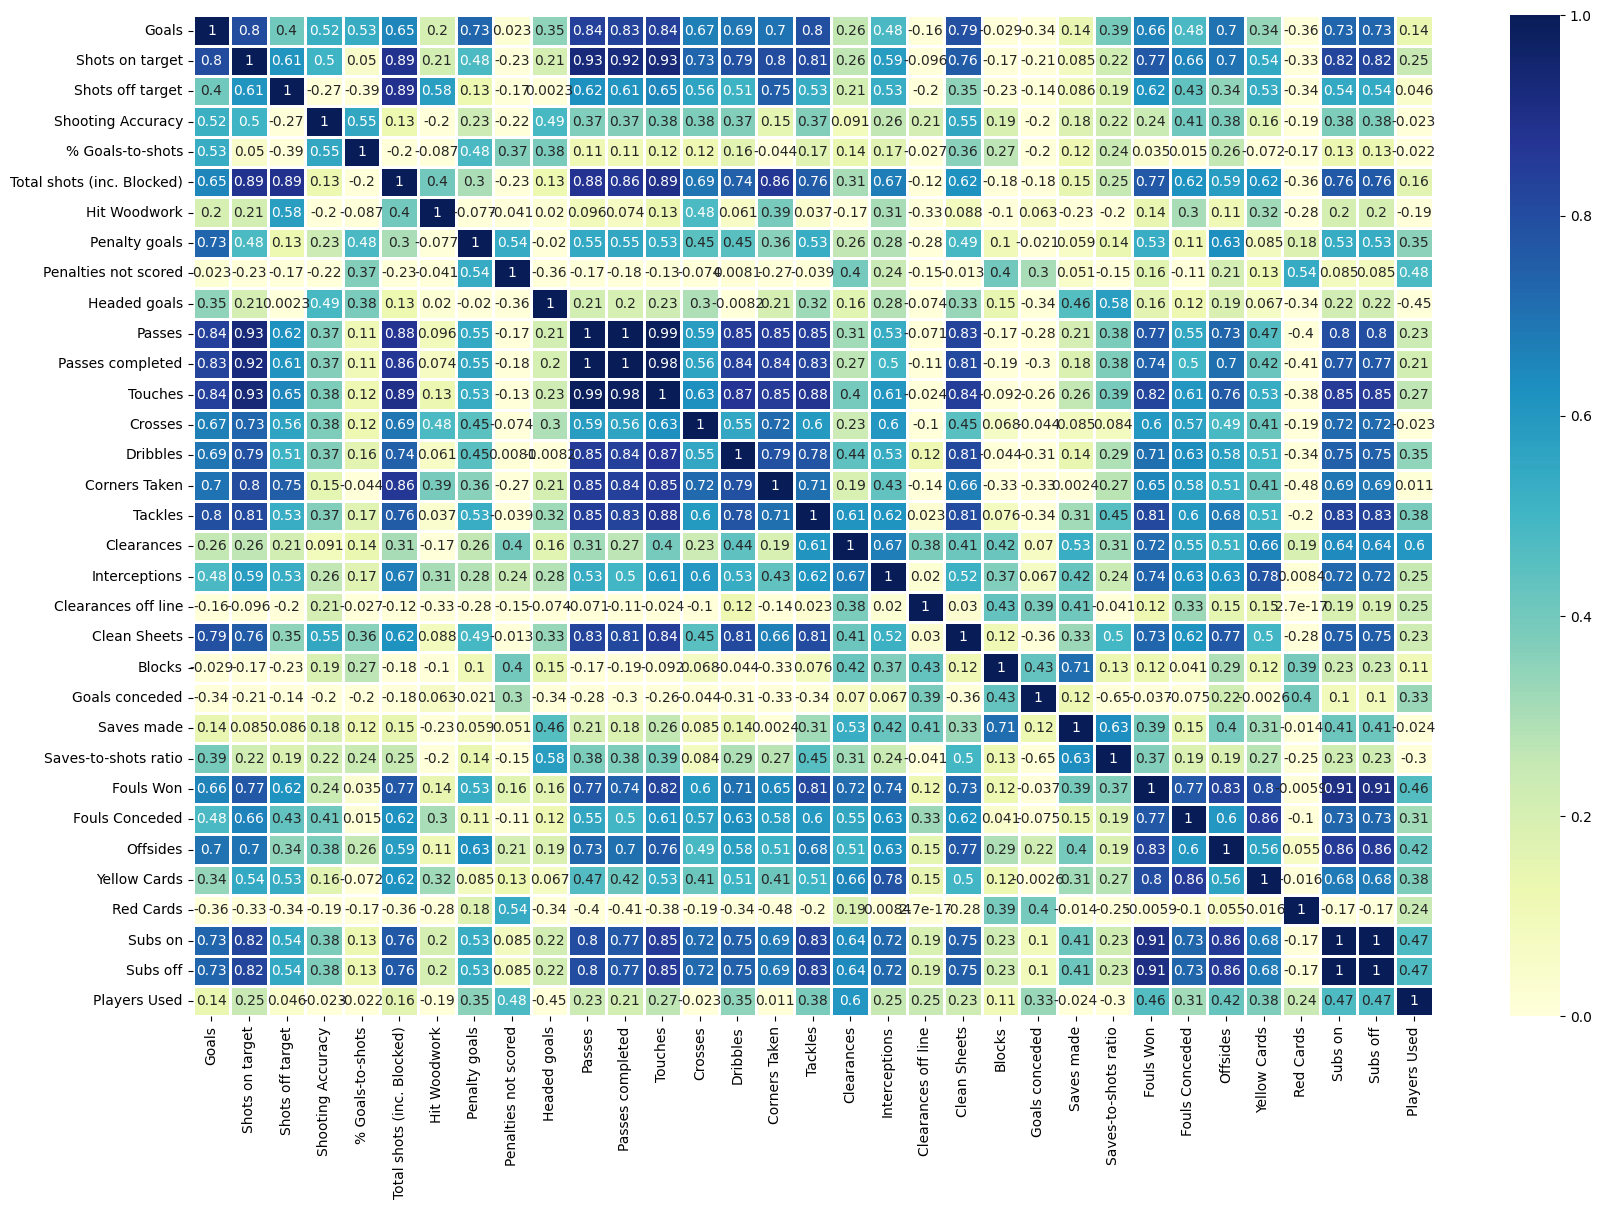

In [40]:
fig, ax = plt.subplots(figsize=(20,13))
sns.heatmap(data.corr(), vmin=0, vmax=1, linewidths=.8, cmap="YlGnBu", annot=True);

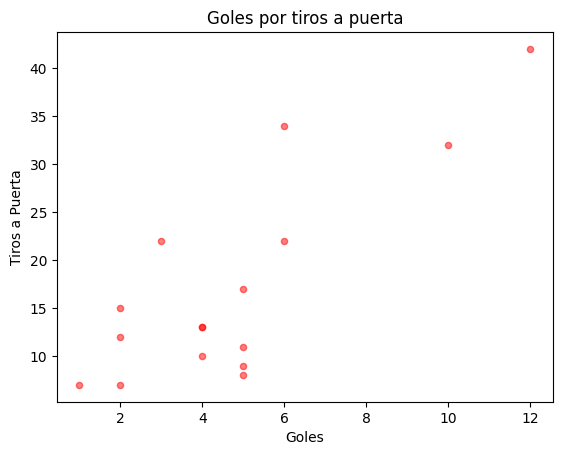

In [75]:
data.plot(kind='scatter', x='Goals', y='Shots on target',alpha = 0.5,color = 'red')
plt.xlabel('Goles')             
plt.ylabel('Tiros a Puerta')
plt.title('Goles por tiros a puerta');

## 4. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos

In [9]:
X = data[["Shooting Accuracy"]]
y = data["Goals"]

In [21]:
# X

In [23]:
# y

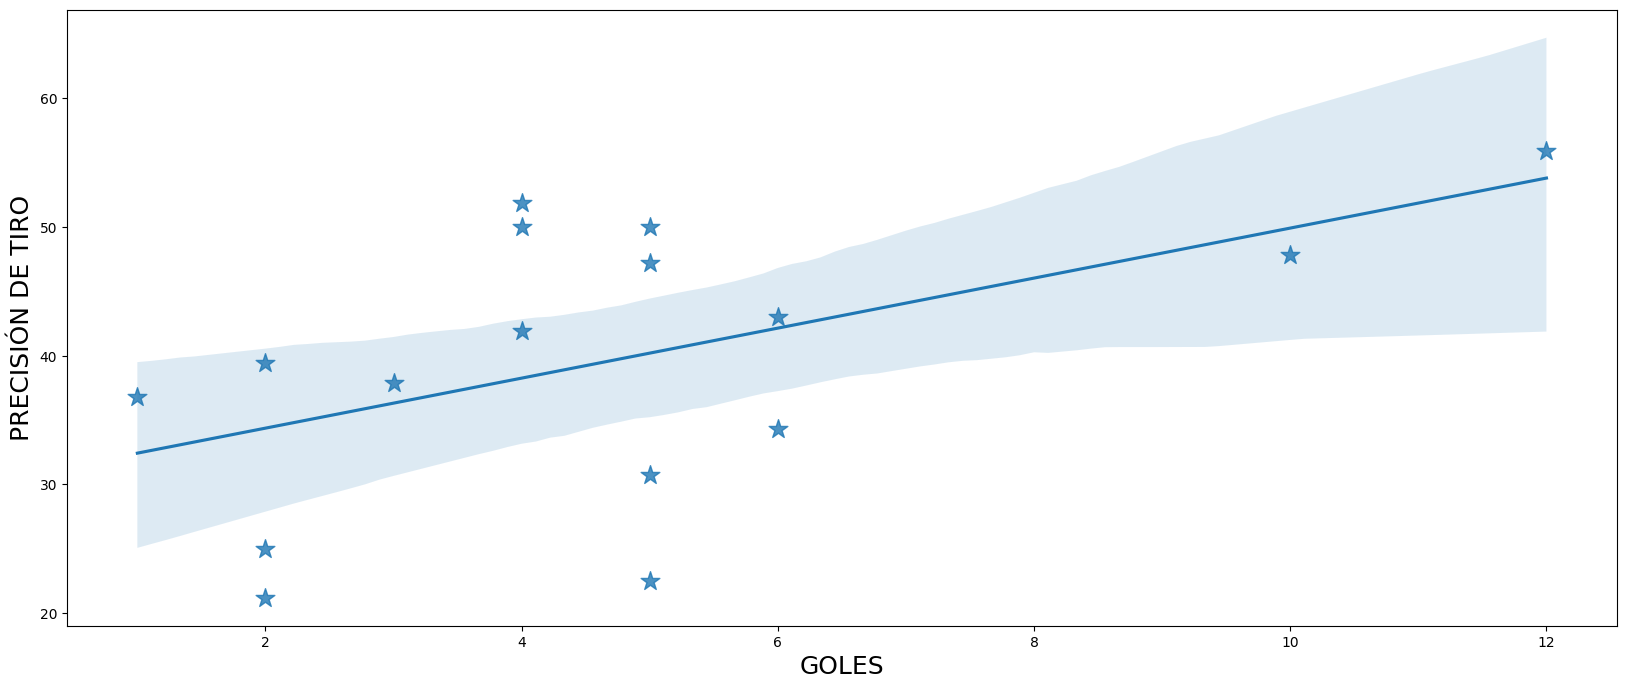

In [84]:
fig, ax = plt.subplots(figsize=(20, 8))


sns.regplot(x ="Goals", y = "Shooting Accuracy", data=data, ax=ax, marker='*', scatter_kws={'s':200});
plt.xlabel('GOLES', size=18)
plt.ylabel('PRECISIÓN DE TIRO', size=18);

In [10]:
X_train, y_train = data['Shooting Accuracy'], data['Shooting Accuracy']
x_test, y_test = data['Goals'], data['Goals']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.8,
                                                    random_state=0)

In [13]:
print("X_TRAIN:", X_train.shape)
print("y_TRAIN:", y_train.shape)
print("X_TEST:", X_test.shape)
print("y_TEST:", y_test.shape)

X_TRAIN: (12, 1)
y_TRAIN: (12,)
X_TEST: (4, 1)
y_TEST: (4,)


## MODELO DE REGRESIÓN LINEAL

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lm = LinearRegression()
print(lm)
print(type(lm))

LinearRegression()
<class 'sklearn.linear_model._base.LinearRegression'>


In [16]:
lm.fit(X_train, y_train)

LinearRegression()

In [39]:
y_hat = lm.predict(X_test)
print(y_hat)

[5.29997592 3.73793799 2.94297226 4.95130674]


In [41]:
resid = y_test - y_hat

resid

1   -1.299976
6    1.262062
8   -0.942972
9   -2.951307
Name: Goals, dtype: float64

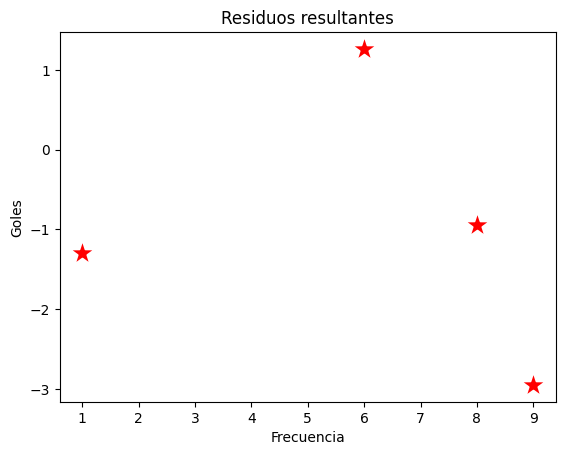

In [54]:
sns.scatterplot(resid, marker='*', color='red', s=400)
plt.title("Residuos resultantes")
plt.xlabel("Frecuencia")
plt.ylabel("Goles");

In [56]:
y_hat_train = lm.predict(X_train)
print(y_hat_train)

[7.25252332 4.74210523 6.42966406 6.03915458 4.24002161 5.45339035
 2.41299511 4.58869079 6.42966406 6.69465263 6.12283518 2.59430308]


In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

print('Resultados de la Regresión Lineal')
print(f"MSE Train: {mean_squared_error(y_train, y_hat_train):.2f}")
print(f"MAPE Train: {mean_absolute_percentage_error(y_train, y_hat_train):.2f}")
print(f"MAE Train: {mean_absolute_error(y_train, y_hat_train):.2f}")
print(f"R^2 Train: {r2_score(y_train, y_hat_train):.2f}")

print("*********************************")

print(f"MSE Test: {mean_squared_error(y_test, y_hat):.2f}")
print(f"MAPE Test: {mean_absolute_percentage_error(y_test, y_hat):.2f}")
print(f"MAE Test: {mean_absolute_error(y_test, y_hat):.2f}")
print(f"R^2 Test: {r2_score(y_test, y_hat):.2f}")

Resultados de la Regresión Lineal
MSE Train: 6.59
MAPE Train: 0.65
MAE Train: 2.22
R^2 Train: 0.26
*********************************
MSE Test: 3.22
MAPE Test: 0.63
MAE Test: 1.61
R^2 Test: -0.91


## MODELO DE REGRESIÓN LOGÍSTICA

In [21]:
from sklearn.linear_model import LogisticRegression

In [33]:
rl = LogisticRegression()

rl.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [34]:
y_hat2= rl.predict(X_test)

In [35]:
y_hat2_train = rl.predict(X_train)

In [59]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('Resultados de la Regresión Logistica')
print(f"MSE Train: {mean_squared_error(y_train, y_hat2_train):.2f}")
print(f"MAPE Train: {mean_absolute_percentage_error(y_train, y_hat2_train):.2f}")
print(f"MAE Train: {mean_absolute_error(y_train, y_hat2_train):.2f}")
print(f"R^2 Train: {r2_score(y_train, y_hat2_train):.2f}")

print("*********************************")

print(f"MSE Test: {mean_squared_error(y_test, y_hat2):.2f}")
print(f"MAPE Test: {mean_absolute_percentage_error(y_test, y_hat2):.2f}")
print(f"MAE Test: {mean_absolute_error(y_test, y_hat2):.2f}")
print(f"R^2 Test: {r2_score(y_test, y_hat2):.2f}")

Resultados de la Regresión Logistica
MSE Train: 10.08
MAPE Train: 0.58
MAE Train: 2.08
R^2 Train: -0.14
*********************************
MSE Test: 4.75
MAPE Test: 0.81
MAE Test: 1.75
R^2 Test: -1.81


## MODELO SVR

In [32]:
from sklearn.svm import SVR

In [37]:
m_svr = SVR()

m_svr.fit(X_train, y_train)

y_hat3 = m_svr.predict(X_test)

y_hat3_train = m_svr.predict(X_train)

In [60]:
print('Resultados del modelo SVR')
print(f"MSE Train: {mean_squared_error(y_train, y_hat3_train):.2f}")
print(f"MAPE Train: {mean_absolute_percentage_error(y_train, y_hat3_train):.2f}")
print(f"MAE Train: {mean_absolute_error(y_train, y_hat3_train):.2f}")
print(f"R^2 Train: {r2_score(y_train, y_hat3_train):.2f}")

print("*********************************")

print(f"MSE Test: {mean_squared_error(y_test, y_hat3):.2f}")
print(f"MAPE Test: {mean_absolute_percentage_error(y_test, y_hat3):.2f}")
print(f"MAE Test: {mean_absolute_error(y_test, y_hat3):.2f}")
print(f"R^2 Test: {r2_score(y_test, y_hat3):.2f}")

Resultados del modelo SVR
MSE Train: 8.67
MAPE Train: 0.64
MAE Train: 2.08
R^2 Train: 0.02
*********************************
MSE Test: 4.12
MAPE Test: 0.76
MAE Test: 1.65
R^2 Test: -1.44


### CONCLUSIÓN: A mayor porcentaje de precisión en el tiro, aumenta el número de goles

## 5. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

    - % de goles por disparo: 40%
    - Total shots (inc. Blocked): 102
    - Corners Taken: 5
    - Passes: 82
    - Dribbles: 23